# Gradient discent

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
def f1(x_R2):
    return (x_R2[0]-3)**2+(x_R2[1]-1)**2
def grad_f1(x_R2):
    return np.array((2*(x_R2[0]-3),2*(x_R2[1]-1)))

def f2(x_R2):
    return 10*(x_R2[0]-1)**2+(x_R2[1]-2)**2
def grad_f2(x_R2):
    return np.array((20*(x_R2[0]-1),2*(x_R2[1]-2)))

def f3(x_Rn):   
    A=np.vander(np.linspace(0,1,len(x_Rn)))
    return 0.5*np.linalg.norm(A@x_Rn-A@np.ones(len(x_Rn),).T,2)**2
def grad_f3(x_Rn):
    A=np.vander(np.linspace(0,1,len(x_Rn),dtype=int))
    grad=[]
    vector=A.T@np.array(A@x_Rn-A@np.ones(len(x_Rn),).T)
    for i in range(len(x_Rn)):
        grad.append(vector[i])
    return np.array(grad)

def f4(lambda_=0.5):
    #lambda must be from zero to one
    lambda_=lambda_
    return lambda x_Rn: 0.5*(np.linalg.norm(np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))@x_Rn-np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))@np.ones(len(x_Rn),).T,2)**2+lambda_*np.linalg.norm(x_Rn,2))**2
def grad_f4(x_Rn,lambda_):
    A=np.vander(np.linspace(0,1,len(x_Rn)),len(x_Rn))
    lambda_=0.5
    grad=np.zeros((len(x_Rn)))
    vector1=A.T@np.array(A@x_Rn-A@np.ones(len(x_Rn),).T) +lambda_*np.array(x_Rn)
    for i in range(len(x_Rn)):
        grad[i]=lambda_*np.array(x_Rn)[i]+vector1[i]
    return np.array(grad)

def f5(x):
    return (x**4+x**3-2*x**2-2*x)
def grad_f5(x):
    return (4*x**3+3*x**2-4*x-2)

In [47]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x),2)**2 :
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha


In [54]:
def GD(f,grad_f,x0,tolf=10e-6,tolx=10e-6,kmax=100,alpha=0.1):
    #As output x as stationary point
    #f<-val a vector containing the values of f during the iterations
    #err_vall a vector containing the values of || grad of f(x,k)||
    var=alpha
    alpha=alpha
    #initialization:
    x0=np.array(x0)
    x=np.zeros((kmax+1,x0.shape[0]))
    f_vec=np.zeros((kmax+1,))
    err_vec=np.zeros((kmax+1,))
    grad_vec=np.zeros((kmax+1,x0.shape[0]))
    cond1=True
    cond2=True
    f_vec[0]=f(x0)
    grad_vec[0]=grad_f(x0)
    x[0]=x0
    k=1
    #err_val[0]=grad_f(x0)                                  
    while(cond1 and cond2 and k<kmax):
        if var==True:
             alpha=backtracking(f,grad_f,x[k-1])
        else:
            alpha=alpha
        x[k]=x[k-1]-alpha*grad_vec[k-1]
        f_vec[k]=f(x[k])  
        grad_vec[k]=grad_f(x[k])
        err_vec[k]=np.linalg.norm(grad_vec[k],2)
        cond1=np.linalg.norm(grad_vec[k],2)>tolf*np.linalg.norm(grad_vec[0],2) 
        cond2=np.linalg.norm(x[k]-x[k-1],2)>tolx*np.linalg.norm(x[k-1],2)
        k+=1
    return x,f_vec,err_vec,grad_vec,k


#### Punto 1
Funzione 1

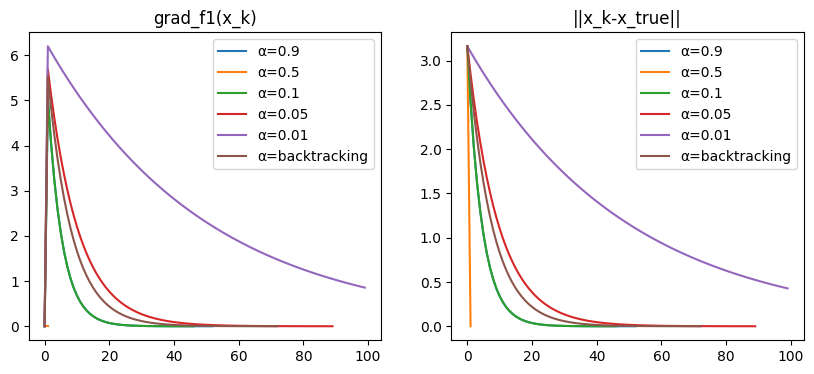

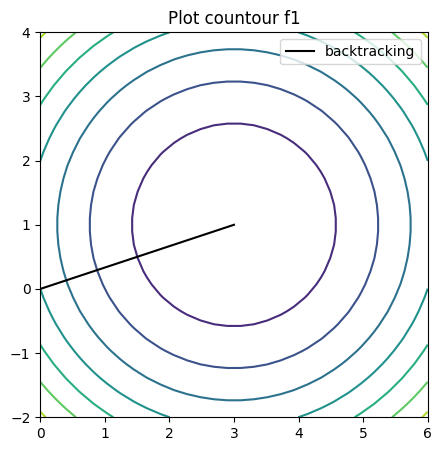

In [56]:
alpha=np.array([0.9,0.50,0.1,0.05,0.01,True])
plt.figure(figsize=(10,4))
legend=["α=0.9","α=0.5","α=0.1","α=0.05","α=0.01","α=backtracking"]
sol=np.array((3,1))
plt.subplot(1,2,1)
plt.title("grad_f1(x_k)")
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f1,grad_f1,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    plt.plot(k_vec,err_vec[:k])    
plt.legend(legend)
    
plt.subplot(1,2,2)
plt.title("||x_k-x_true||")
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f1,grad_f1,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
    plt.plot(k_vec,error[:k])
plt.legend(legend)
plt.show()

plt.figure(figsize=[5,5])
plt.title("Plot countour f1")
xv = np.linspace(0,6, 30)
yv = np.linspace(-2,4, 30)
xx,yy=np.meshgrid(xv,yv)
def f1_plot(x1,x2):
    return (x1-3)**2+(x2-1)**2
zz=f1_plot(xx,yy)
plt.contour(xx,yy,zz)
plt.plot(x[:k,0],x[:k,1],color="black");
plt.legend(["backtracking"]);

### Function 2

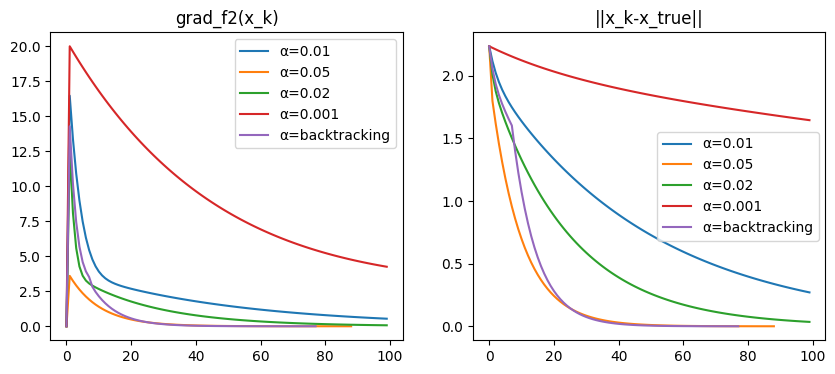

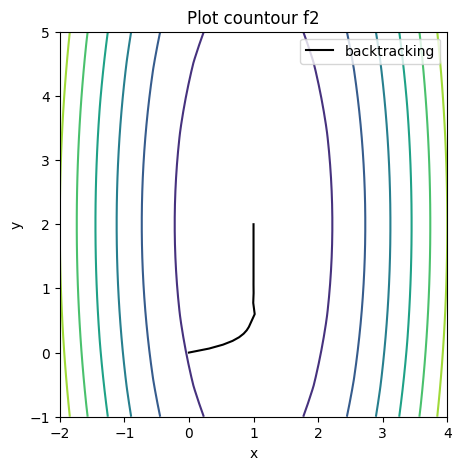

In [50]:
alpha=np.array([0.01,0.05,0.02,0.001,True])
plt.figure(figsize=(10,4))
legend=["α=0.01","α=0.05","α=0.02","α=0.001","α=backtracking"]
sol=np.array((1,2))
plt.subplot(1,2,1)
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f2,grad_f2,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    plt.subplot(1,2,1)
    plt.title("grad_f2(x_k)")
    plt.plot(k_vec,err_vec[:k])
plt.legend(legend)  

plt.subplot(1,2,2)
for i in alpha:
    x,f_vec,err_vec,grad_vec,k=GD(f2,grad_f2,alpha=i,x0=(0,0),kmax=100)
    k_vec=np.linspace(0,k-1,k,dtype=int)
    plt.title("||x_k-x_true||")
    error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
    plt.plot(k_vec,error[:k])
plt.legend(legend)
plt.show()
plt.figure(figsize=[5,5])
plt.title("Plot countour f2")
xv = np.linspace(-2,4, 30)
yv = np.linspace(-1,5, 30)
xx,yy=np.meshgrid(xv,yv)
def f2_plot(x1,x2):
     return 10*(x1-1)**2+(x2-2)**2
zz=f2_plot(xx,yy)
plt.xlabel("x")
plt.ylabel("y")
plt.contour(xx,yy,zz);
plt.plot(x[:k,0],x[:k,1],color="black");
plt.legend(["backtracking"]);

### Function 3

dimension =  2


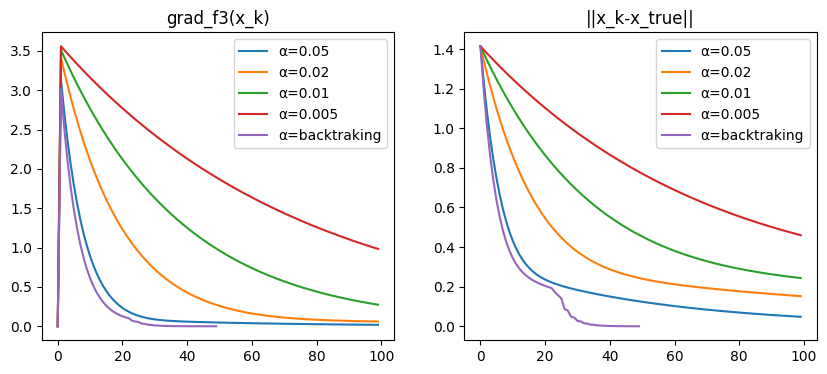

dimension =  10


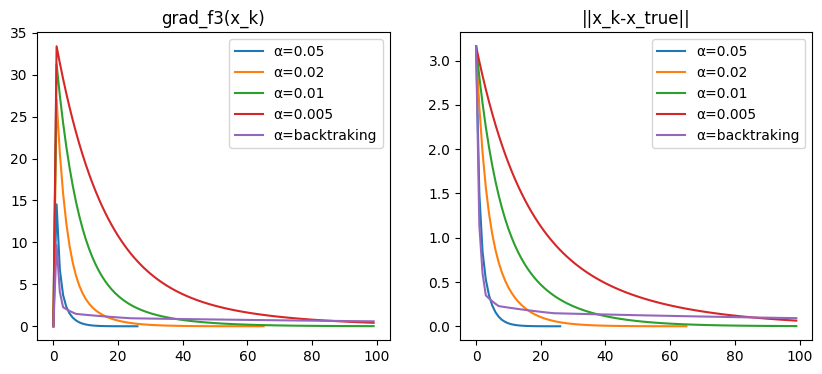

dimension =  20


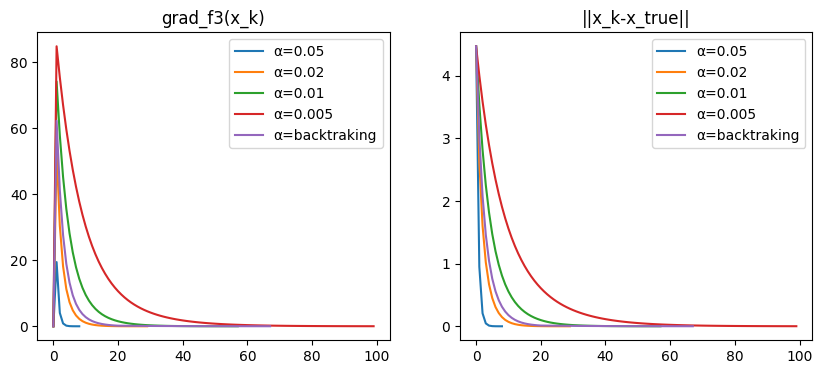

In [58]:
n=np.array([2,10,20])
alpha=np.array([.05, .02, .01, .005,True])
legend=["α=0.05","α=0.02","α=0.01","α=0.005","α=backtraking"]
for j in n:
    sol=np.ones((j,))
    print("dimension = ",j)
    plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    plt.title("grad_f3(x_k)")
    for i in alpha:
        x,f_vec,err_vec,grad_vec,k=GD(f3,grad_f3,alpha=i,x0=np.zeros((j,)),kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        plt.plot(k_vec,err_vec[:k])
    plt.legend(legend)  
     
    plt.subplot(1,2,2)
    plt.title("||x_k-x_true||")
    for i in alpha:
        x,f_vec,err_vec,grad_vec,k=GD(f3,grad_f3,alpha=i,x0=np.zeros((j,)),kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
        plt.plot(k_vec,error[:k])
    plt.legend(legend)    
    plt.show()


### Function 4

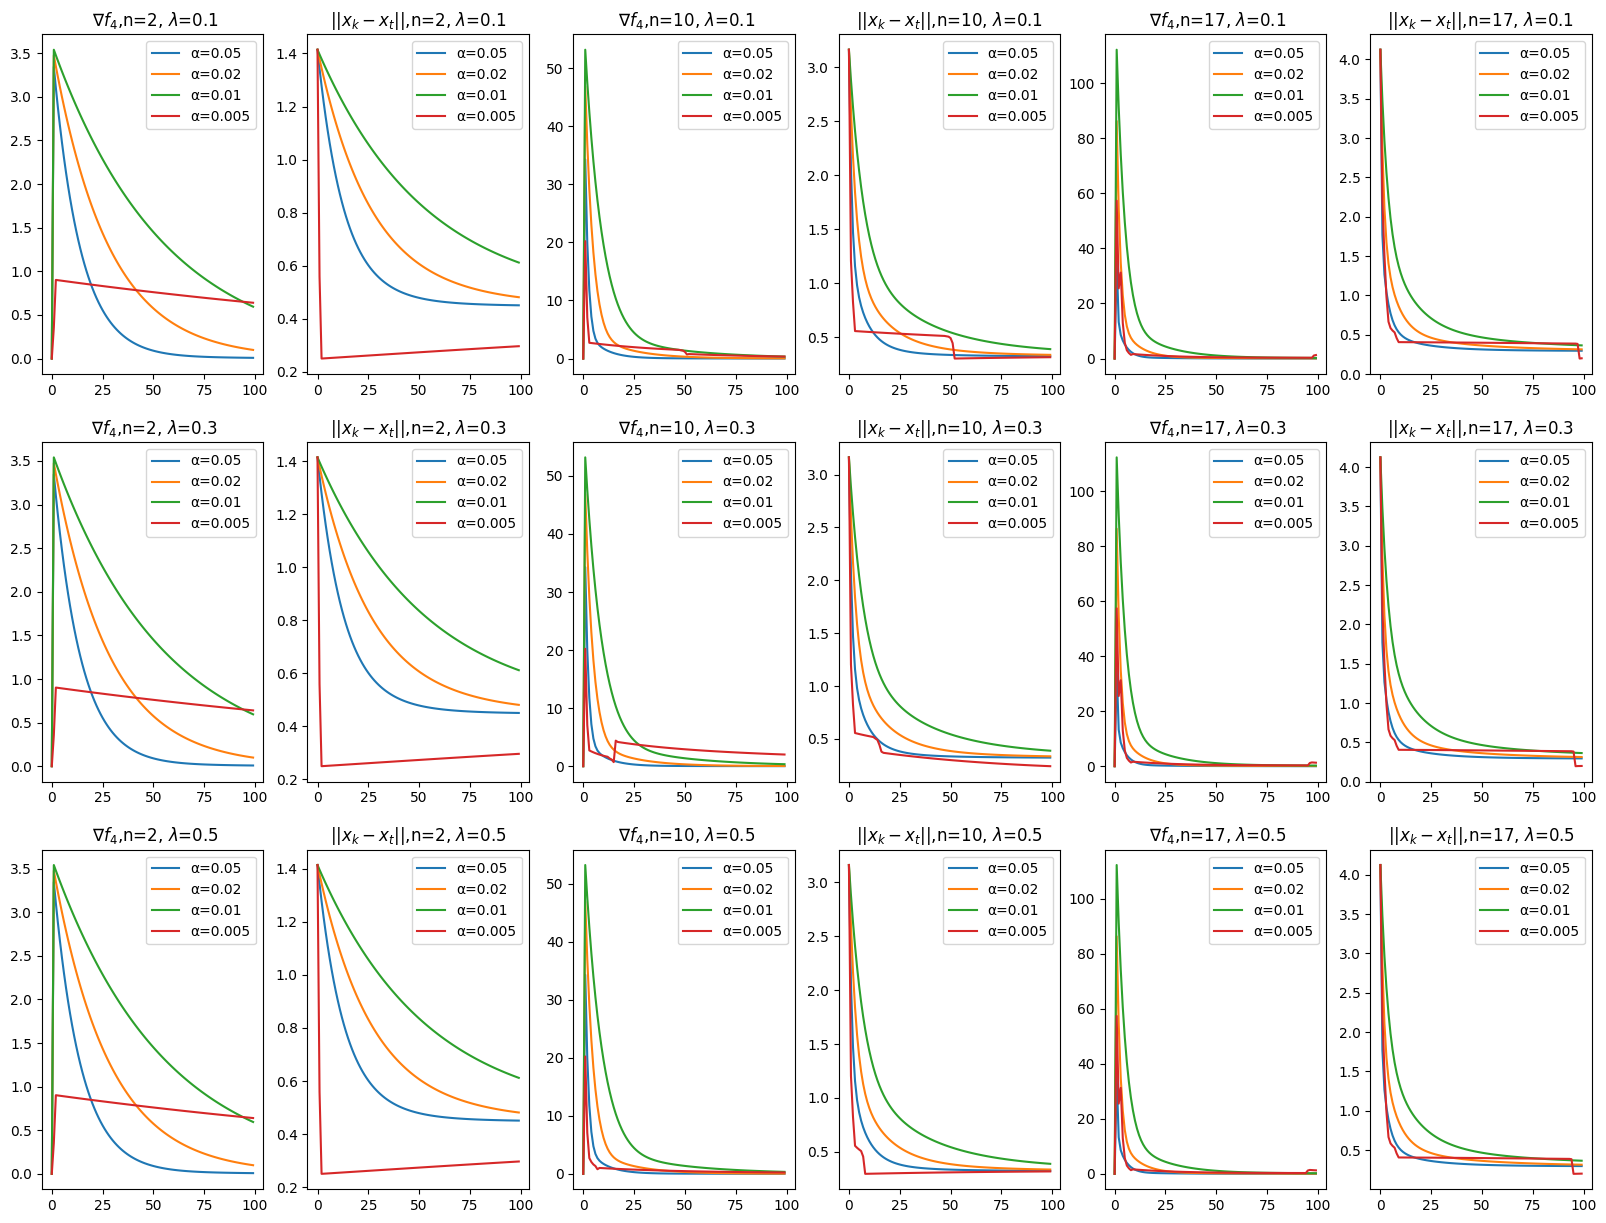

In [60]:
n=np.array([2,10,17])
alpha=np.array([.02, .01, .005,True])
legend=["α=0.05","α=0.02","α=0.01","α=0.005","α=Backtraking"]
lambda_=[0.1, 0.3, 0.5]
plt.figure(figsize=[20,15])
index=1
for indl,lam in enumerate(lambda_):
    for ind,j in enumerate(n):
        plt.subplot(len(lambda_),len(n)*2,index)
        sol=np.ones((j,))
        plt.title(f" ∇$f_4$,n={j}, $\lambda$={lam}")
        for i in alpha:
                gradf4=lambda x_Rn: grad_f4(x_Rn,lam)
                x,f_vec,err_vec,grad_vec,k=GD(f4(lam),gradf4,alpha=i,x0=np.zeros((j,)),kmax=100)
                k_vec=np.linspace(0,k-1,k,dtype=int)
                plt.plot(k_vec,err_vec[:k])
        plt.legend(legend)
        plt.subplot(len(lambda_),len(n)*2,index+1)
        plt.title(f"||$x_k-x_t$||,n={j}, $\lambda$={lam}")
        for i in alpha:
                gradf4=lambda x_Rn: grad_f4(x_Rn,lam)
                x,f_vec,err_vec,grad_vec,k=GD(f4(lam),gradf4,alpha=i,x0=np.zeros((j,)),kmax=100)
                error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
                plt.plot(k_vec,error)
        plt.legend(legend)
        index+=2
plt.show()

### Function 5

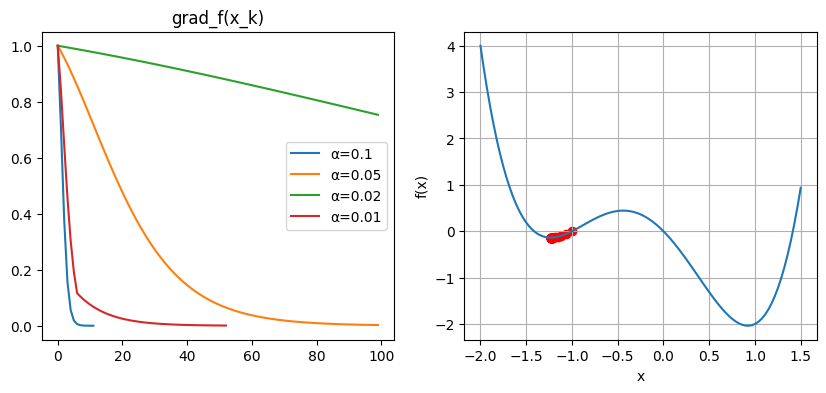

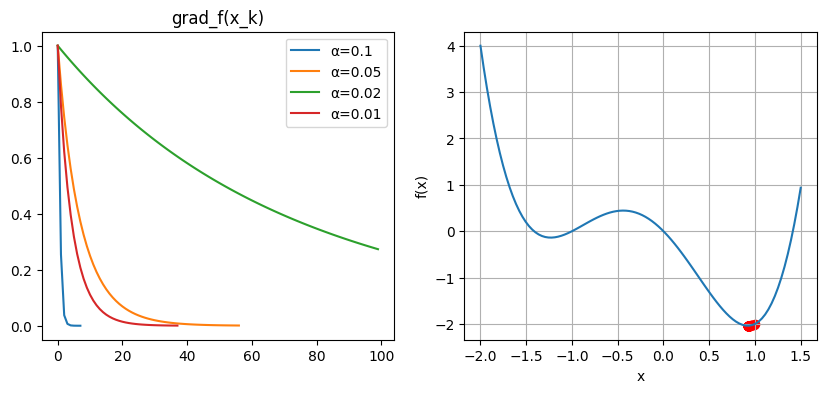

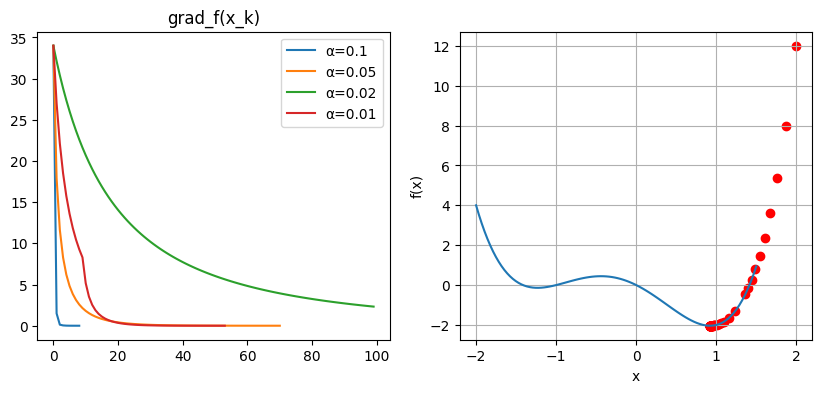

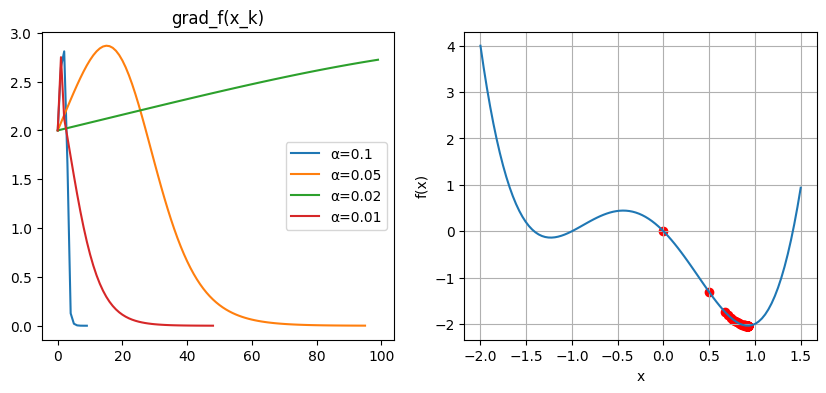

In [55]:
alpha=np.array([0.1, .01, .001,True])
xstart=[[-1],[1],[2],[0]]
legend=["α=0.1","α=0.05","α=0.02","α=0.01","α=0.001","α=Backtraking"]
for x_0 in xstart:
    plt.figure(figsize=[10,4])
    for i in alpha: 
        plt.subplot(1,2,1)
        plt.title("grad_f(x_k)")
        x,f_vec,err_vec,grad_vec,k=GD(f5,grad_f5,alpha=i,x0=x_0,kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        grad_vec=[np.linalg.norm(i,2) for i in grad_vec]
        plt.plot(k_vec,grad_vec[:k])
    plt.legend(legend)
    plt.subplot(1,2,2)
    plt.scatter(x[:k],f_vec[:k],c="r")
    x=np.linspace(-2,1.5,100)
    y=f5(x)
    plt.plot(x,y)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    '''plt.title("||x_k-x_true||")
    for  i in alpha:
        
        x,f_vec,err_vec,grad_vec,k=GD(f5,grad_f5,alpha=i,x0=x_0,kmax=100)
        k_vec=np.linspace(0,k-1,k,dtype=int)
        error=np.array([np.linalg.norm(np.expand_dims(x[i],1)-np.expand_dims(sol,1),2) for i in range(len(k_vec))])
        plt.plot(k_vec,error[:k])
    plt.legend(legend)'''
    
    plt.show()

# Stochastic Gradient Descent

In [ ]:
data=pd.read_csv("data.csv")
data=np.array(data)
digits=[0,6]

In [ ]:
import math
import warnings

#suppress warnings
warnings.filterwarnings('ignore')


def sigmoid(x):
    return 1./(1+math.e**(-x))
    
def f(w,xhat):
    return sigmoid(xhat.T@w)

def ell(w,Xcheck,Y):
    vec_f=np.array([f(w,Xcheck[:,i]) for i in range(Xcheck.shape[1])])
    return (1/len(Y))*np.linalg.norm(vec_f-Y,2)

def grad_ell(w,Xcheck,Y):
    sum=0
    for i in range(Xcheck.shape[1]):
        func=f(w,Xcheck[:,i])
        sum+=func*(1-func)*(func-Y[i])*Xcheck[:,i]
    return  np.array(sum)/Xcheck.shape[1]


def predict(w,Xcheck,threshold=0.5):
    fw=f(w,Xcheck)
    preds=np.zeros((Xcheck.shape[1],))
    preds=fw>threshold
    return preds

def accuracy(Y_1, Y_2):
    Y_2[Y_2==digits[0]]=0
    Y_2[Y_2==digits[1]]=1
    array = Y_1 == Y_2
    return len(array[array==True])/len(array)


In [ ]:
def split_data(dataset,digits,TrainPercentage):
    X=dataset[:,1:].T
    Y=dataset[:,0]
    ind=[i for i in range(len(Y)) if Y[i] in digits]       
    Yp=Y[ind]
    Xp=X[:,ind]
    Ntrain=int(Yp.shape[0]*TrainPercentage)
    Xp=np.concatenate((np.ones((1,len(Yp))),Xp),axis=0)
    Xtrain,Ytrain=Xp[:,:Ntrain],Yp[:Ntrain]
    Xtest,Ytest=Xp[:,Ntrain:],Yp[Ntrain:]
    return Xtrain,Ytrain,Xtest,Ytest

def SGD(l,grad_l,w0,data,batch_size,n_epoch):
    alpha=0.01
    k=0
    X,y=data
    X=X-np.expand_dims(np.mean(X,axis=1),1) 
    
    y[y==digits[0]]=0
    y[y==digits[1]]=1
   
    d,N=X.shape
    n_batch_per_epoch=N//batch_size
    
    w=np.array(w0)
    fval=np.zeros((n_epoch,))
    gradl=np.zeros((n_epoch,d))
    err=np.zeros((n_epoch,))
    w_vec=np.zeros((n_batch_per_epoch*n_epoch,len(w0)))
    
    for epoch in range(n_epoch):
        index=np.linspace(0,len(y)-1,len(y),dtype=int)
        np.random.shuffle(index)
        X=X[:,index]
        y=y[index]
        for i in range(n_batch_per_epoch):
            Xbetch=X[:,(i*batch_size):((i+1)*batch_size)]
            ybetch=y[(i*batch_size):((i+1)*batch_size)]
            w=w-alpha*grad_ell(w,Xbetch,ybetch) 
            w_vec[epoch * n_batch_per_epoch + i, :]=w
        fval[epoch]=ell(w,X,y)
        gradl[epoch,:]=grad_ell(w,X,y)
        err[epoch]=np.linalg.norm(grad_ell(w,X,y),2)
    return w_vec,fval,gradl,err


mean=0
sigma=1e-3
#data.shape
Xtrain,Ytrain,Xtest,Ytest=split_data(data,digits,0.9)


w0=np.random.normal(mean,sigma,size=Xtrain.shape[0])
w_vec,fval,gradl,err=SGD(ell,grad_ell,w0,(Xtrain,Ytrain),batch_size=8,n_epoch=1)

Ypred=predict(w_vec[-1],Xtest)
print("Accuracy:",accuracy(Ypred,Ytest))



Accuracy: 0.9649334945586457
